In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop_ 20201031 - 04 Case Information.csv')
data

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C642447,25.0,25 to 29,MALE,2020-07-14,2020-07-15,2020-07-19,NaN,NaN,RECOVERED,...,COTABATO CITY (NOT A PROVINCE),NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
1,C919481,54.0,50 to 54,MALE,2020-07-27,2020-07-30,2020-08-03,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
2,C378726,50.0,50 to 54,FEMALE,2020-07-18,2020-07-19,2020-07-24,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
3,C556553,30.0,30 to 34,FEMALE,2020-05-27,2020-05-27,2020-05-31,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
4,C210854,33.0,30 to 34,MALE,2020-07-21,2020-07-24,2020-07-28,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380724,C881229,29.0,25 to 29,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380725,C591169,22.0,20 to 24,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380726,C325398,27.0,25 to 29,FEMALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NO,Age or Birthdate is Invalid
380727,C768847,46.0,45 to 49,FEMALE,2020-08-24,2020-08-28,2020-08-30,NaN,2020-09-07,RECOVERED,...,ROMBLON,SANTA MARIA (IMELDA),PH175917000,NaN,NaN,RECOVERED,YES,2020-08-20,NO,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380729 entries, 0 to 380728
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CaseCode           380729 non-null  object 
 1   Age                378546 non-null  float64
 2   AgeGroup           378546 non-null  object 
 3   Sex                380729 non-null  object 
 4   DateSpecimen       318641 non-null  object 
 5   DateResultRelease  319409 non-null  object 
 6   DateRepConf        380729 non-null  object 
 7   DateDied           7155 non-null    object 
 8   DateRecover        91993 non-null   object 
 9   RemovalType        338267 non-null  object 
 10  Admitted           380579 non-null  object 
 11  RegionRes          377056 non-null  object 
 12  ProvRes            355798 non-null  object 
 13  CityMunRes         345275 non-null  object 
 14  CityMuniPSGC       345275 non-null  object 
 15  BarangayRes        151373 non-null  object 
 16  Ba

In [4]:
df = data.drop('CaseCode', axis=1)
df = df.drop(df.loc[:,'AgeGroup':'Sex'].columns, axis=1)
df = df.drop(df.loc[:, 'DateResultRelease':'Admitted'].columns, axis=1)
df = df.drop('ProvRes', axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

,Age,DateSpecimen,RegionRes,CityMunRes,HealthStatus,Quarantined
0,25.0,2020-07-14,Region XII: SOCCSKSARGEN,NaN,RECOVERED,NO
1,54.0,2020-07-27,NaN,NaN,RECOVERED,NO
2,50.0,2020-07-18,ROF,NaN,RECOVERED,NO
3,30.0,2020-05-27,NCR,NaN,RECOVERED,NO
4,33.0,2020-07-21,NCR,NaN,RECOVERED,NO
...,...,...,...,...,...,...
380724,29.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380725,22.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380726,27.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380727,46.0,2020-08-24,Region IV-B: MIMAROPA,SANTA MARIA (IMELDA),RECOVERED,YES


In [5]:
titles = list(df.columns)
titles

['Age',
 'DateSpecimen',
 'RegionRes',
 'CityMunRes',
 'HealthStatus',
 'Quarantined']

In [6]:
titles[4], titles[5] = titles[5], titles[4]
titles[2], titles[3] = titles[3], titles[2]
titles

['Age',
 'DateSpecimen',
 'CityMunRes',
 'RegionRes',
 'Quarantined',
 'HealthStatus']

In [7]:
df = df[titles]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,25.0,2020-07-14,NaN,Region XII: SOCCSKSARGEN,NO,RECOVERED
1,54.0,2020-07-27,NaN,NaN,NO,RECOVERED
2,50.0,2020-07-18,NaN,ROF,NO,RECOVERED
3,30.0,2020-05-27,NaN,NCR,NO,RECOVERED
4,33.0,2020-07-21,NaN,NCR,NO,RECOVERED
...,...,...,...,...,...,...
380724,29.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380725,22.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380726,27.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380727,46.0,2020-08-24,SANTA MARIA (IMELDA),Region IV-B: MIMAROPA,YES,RECOVERED


In [8]:
start_date = '2020-09-1'
end_date = '2020-10-1'

df = df.loc[df['RegionRes'] == 'NCR']
df = df.loc[(df['DateSpecimen'] >= start_date) & ((df['DateSpecimen'] <= end_date))]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
376,59.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
736,32.0,2020-09-28,CITY OF NAVOTAS,NCR,YES,RECOVERED
856,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
1167,46.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
1184,59.0,2020-09-22,CITY OF MANILA,NCR,NO,RECOVERED
...,...,...,...,...,...,...
375985,24.0,2020-09-25,TAGUIG CITY,NCR,NO,RECOVERED
375989,48.0,2020-09-24,TAGUIG CITY,NCR,NO,RECOVERED
376033,41.0,2020-09-23,TAGUIG CITY,NCR,NO,RECOVERED
376034,57.0,2020-09-28,TAGUIG CITY,NCR,NO,RECOVERED


In [9]:
#Cities in NCR
cities = df['CityMunRes'].unique().tolist()

cities

['CITY OF NAVOTAS',
 'CITY OF MANILA',
 nan,
 'CITY OF MALABON',
 'CITY OF PASIG',
 'CALOOCAN CITY',
 'QUEZON CITY',
 'CITY OF SAN JUAN',
 'CITY OF PARAÑAQUE',
 'CITY OF MAKATI',
 'CITY OF MARIKINA',
 'CITY OF MANDALUYONG',
 'CITY OF VALENZUELA',
 'CITY OF LAS PIÑAS',
 'CITY OF MUNTINLUPA',
 'PASAY CITY',
 'PATEROS',
 'TAGUIG CITY']

In [10]:
hpStats = df['HealthStatus'].unique().tolist()
hpStats

['RECOVERED', 'MILD', 'SEVERE', 'DIED', 'ASYMPTOMATIC', 'CRITICAL']

In [11]:
df = df.reset_index(drop=True)
#df['HealthStatus'].replace(to_replace=['MILD','SEVERE','ASYMPTOMATIC','CRITICAL'],value='SICK',inplace=True)
#hpStats = df['HealthStatus'].unique().tolist()

hpStats

['RECOVERED', 'MILD', 'SEVERE', 'DIED', 'ASYMPTOMATIC', 'CRITICAL']

In [12]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,59.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,32.0,2020-09-28,CITY OF NAVOTAS,NCR,YES,RECOVERED
2,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
3,46.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
4,59.0,2020-09-22,CITY OF MANILA,NCR,NO,RECOVERED
...,...,...,...,...,...,...
20264,24.0,2020-09-25,TAGUIG CITY,NCR,NO,RECOVERED
20265,48.0,2020-09-24,TAGUIG CITY,NCR,NO,RECOVERED
20266,41.0,2020-09-23,TAGUIG CITY,NCR,NO,RECOVERED
20267,57.0,2020-09-28,TAGUIG CITY,NCR,NO,RECOVERED


In [13]:
df['DateSpecimen'] = pd.to_datetime(df['DateSpecimen'], format='%Y-%m-%d')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,59.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,32.0,2020-09-28,CITY OF NAVOTAS,NCR,YES,RECOVERED
2,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
3,46.0,2020-09-10,CITY OF NAVOTAS,NCR,YES,RECOVERED
4,59.0,2020-09-22,CITY OF MANILA,NCR,NO,RECOVERED
...,...,...,...,...,...,...
20264,24.0,2020-09-25,TAGUIG CITY,NCR,NO,RECOVERED
20265,48.0,2020-09-24,TAGUIG CITY,NCR,NO,RECOVERED
20266,41.0,2020-09-23,TAGUIG CITY,NCR,NO,RECOVERED
20267,57.0,2020-09-28,TAGUIG CITY,NCR,NO,RECOVERED


In [14]:
df['DateSpecimen'] = df['DateSpecimen'].dt.strftime('%m/%d/%Y')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,59.0,09/10/2020,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,32.0,09/28/2020,CITY OF NAVOTAS,NCR,YES,RECOVERED
2,39.0,10/02/2020,CITY OF NAVOTAS,NCR,YES,RECOVERED
3,46.0,09/10/2020,CITY OF NAVOTAS,NCR,YES,RECOVERED
4,59.0,09/22/2020,CITY OF MANILA,NCR,NO,RECOVERED
...,...,...,...,...,...,...
20264,24.0,09/25/2020,TAGUIG CITY,NCR,NO,RECOVERED
20265,48.0,09/24/2020,TAGUIG CITY,NCR,NO,RECOVERED
20266,41.0,09/23/2020,TAGUIG CITY,NCR,NO,RECOVERED
20267,57.0,09/28/2020,TAGUIG CITY,NCR,NO,RECOVERED


In [15]:
c1 = df.loc[df['CityMunRes'] == 'CALOOCAN CITY']
c2 = df.loc[df['CityMunRes'] == 'CITY OF VALENZUELA']

c1 = c1.reset_index(drop=True)
c2 = c2.reset_index(drop=True)

In [16]:
c1

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,27.0,10/07/2020,CALOOCAN CITY,NCR,NO,MILD
1,49.0,09/24/2020,CALOOCAN CITY,NCR,NO,RECOVERED
2,85.0,10/07/2020,CALOOCAN CITY,NCR,NO,DIED
3,25.0,10/05/2020,CALOOCAN CITY,NCR,NO,MILD
4,37.0,09/10/2020,CALOOCAN CITY,NCR,YES,DIED
...,...,...,...,...,...,...
1447,34.0,09/29/2020,CALOOCAN CITY,NCR,YES,RECOVERED
1448,28.0,09/17/2020,CALOOCAN CITY,NCR,YES,RECOVERED
1449,54.0,09/17/2020,CALOOCAN CITY,NCR,NO,RECOVERED
1450,28.0,09/13/2020,CALOOCAN CITY,NCR,NO,RECOVERED


In [17]:
c2

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,41.0,09/19/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
1,1.0,09/21/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
2,63.0,09/10/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
3,28.0,09/21/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
4,1.0,09/21/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
...,...,...,...,...,...,...
1302,33.0,09/29/2020,CITY OF VALENZUELA,NCR,YES,RECOVERED
1303,44.0,09/11/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
1304,30.0,09/15/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED
1305,21.0,09/29/2020,CITY OF VALENZUELA,NCR,NO,RECOVERED


In [18]:
hpStats

['RECOVERED', 'MILD', 'SEVERE', 'DIED', 'ASYMPTOMATIC', 'CRITICAL']

In [19]:
c1['HealthStatus'] = c1['HealthStatus'].map({'RECOVERED':1,'MILD':2,'ASYMPTOMATIC':3,'CRITICAL':4,'SEVERE':5,'DIED':6}) #Classifiers
c2['HealthStatus'] = c2['HealthStatus'].map({'RECOVERED':1,'MILD':2,'ASYMPTOMATIC':3,'CRITICAL':4,'SEVERE':5,'DIED':6})
c1['Quarantined'] = c1['Quarantined'].map({'YES':0, 'NO':1})
c2['Quarantined'] = c2['Quarantined'].map({'YES':0, 'NO':1})

In [36]:
c2

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,41.0,09/19/2020,CITY OF VALENZUELA,NCR,1,1
1,1.0,09/21/2020,CITY OF VALENZUELA,NCR,1,1
2,63.0,09/10/2020,CITY OF VALENZUELA,NCR,1,1
3,28.0,09/21/2020,CITY OF VALENZUELA,NCR,1,1
4,1.0,09/21/2020,CITY OF VALENZUELA,NCR,1,1
...,...,...,...,...,...,...
1302,33.0,09/29/2020,CITY OF VALENZUELA,NCR,0,1
1303,44.0,09/11/2020,CITY OF VALENZUELA,NCR,1,1
1304,30.0,09/15/2020,CITY OF VALENZUELA,NCR,1,1
1305,21.0,09/29/2020,CITY OF VALENZUELA,NCR,1,1


In [21]:
c1[['HealthStatus','Quarantined']] = c1[['HealthStatus','Quarantined']].apply(pd.to_numeric)
c2[['HealthStatus','Quarantined']] = c2[['HealthStatus','Quarantined']].apply(pd.to_numeric)

In [22]:
c1.corr()

,Age,Quarantined,HealthStatus
Age,1.000000,-0.009232,0.117856
Quarantined,-0.009232,1.000000,-0.022967
HealthStatus,0.117856,-0.022967,1.000000


In [23]:
c1x = c1[['Age']] #values that will determine y
c2x = c2[['Age']]
c1y = c1['HealthStatus'] #patient is recovered, sick, or dead
c2y = c2['HealthStatus']

In [24]:
clf = LogisticRegression()

In [25]:
c1x_train, c1x_test, c1y_train, c1y_test = train_test_split(c1x, c1y, test_size = 0.2) #City 1
c2x_train, c2x_test, c2y_train, c2y_test = train_test_split(c2x, c2y, test_size = 0.2) #Makati

In [26]:
clf1 = clf.fit(c1x_train,c1y_train) #modeling
clf2 = clf.fit(c2x_train,c2y_train)

In [35]:
c1_pred = clf1.predict(c1x_test) #if |age = 84, dead
c2_pred = clf2.predict(c2x_test)
c1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [28]:
mc1 = metrics.confusion_matrix(c1y_test, c1_pred)
mc2 = metrics.confusion_matrix(c2y_test, c2_pred)
mc2

array([[253,   0,   0,   0],
       [  6,   0,   0,   0],
       [  1,   0,   0,   0],
       [  2,   0,   0,   0]], dtype=int64)

In [29]:
print(classification_report(c1y_test,c1_pred))
print(classification_report(c2y_test,c2_pred))

              precision    recall  f1-score   support

           1       0.84      1.00      0.91       245
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.84       291
   macro avg       0.21      0.25      0.23       291
weighted avg       0.71      0.84      0.77       291

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       253
           2       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.97       262
   macro avg       0.24      0.25      0.25       262
weighted avg       0.93      0.97      0.95       262



In [30]:
import seaborn as sns

<Figure size 720x720 with 0 Axes>

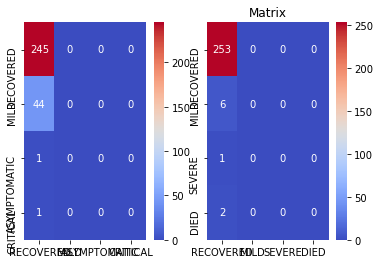

In [31]:
plt.figure(figsize=(10,10))
fig,ax = plt.subplots(1,2)
hc1 = sns.heatmap(pd.DataFrame(mc1), annot=True, cmap="coolwarm",fmt='g',ax=ax[0])
hc2 = sns.heatmap(pd.DataFrame(mc2), annot=True, cmap="coolwarm",fmt='g',ax=ax[1])
hc1.xaxis.set_label_position("top")
hc2.xaxis.set_label_position("top")

hc1Stats = ['RECOVERED','MILD','ASYMPTOMATIC','CRITICAL','SEVERE','DIED']
hc2Stats = ['RECOVERED','MILD','SEVERE','DIED']

hc1.set_xticklabels(hc1Stats)
hc1.set_yticklabels(hc1Stats)
hc2.set_xticklabels(hc2Stats)
hc2.set_yticklabels(hc2Stats)
plt.title('Matrix')
fig.show()

# Per City Analytics

<Figure size 720x720 with 0 Axes>

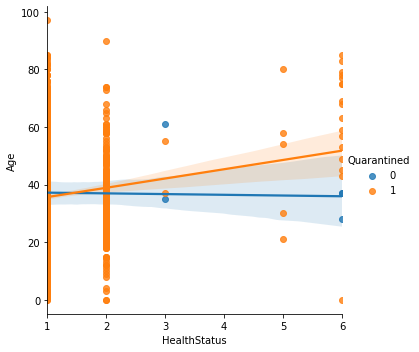

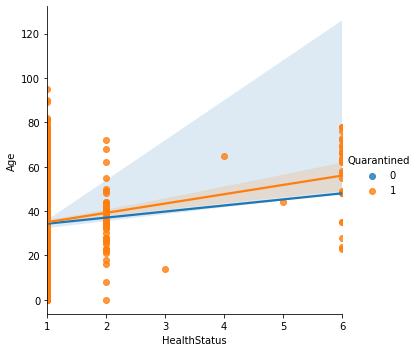

In [32]:
plt.figure(figsize=(10,10))
sns.lmplot(x='HealthStatus',y='Age', hue='Quarantined',data=c1)
sns.lmplot(x='HealthStatus',y='Age', hue='Quarantined',data=c2)
plt.show()

In [33]:
def predC1(x):
    pred = clf1.predict([[x]])
    if pred[0] == 1:
        return 'RECOVERED', pred[0]
    elif pred[0] < 5 and pred[0] > 1:
        return 'SICK', pred[0]
    elif pred[0] == 5:
        return 'DEAD', pred[0]

def predC2(x):
    pred = clf2.predict([[x]])
    if pred[0] == 1:
        return 'RECOVERED', pred[0]
    elif pred[0] < 5 and pred[0] > 1:
        return 'SICK', pred[0]
    elif pred[0] == 5:
        return 'DEAD', pred[0]

In [34]:
#City 2
age = input('Enter Age: ')

print('City 1 Prediction: ', predC1(float(int(age))))
print('City 2 Prediction: ', predC2(float(int(age))))

City 1 Prediction:  ('RECOVERED', 1)
City 2 Prediction:  ('RECOVERED', 1)
